# Iniciando una rutina típica de manejo de datos
1 Obtener los datos
2 Preprocesamiento de datos y limpieza
3 Consolidar todo en un archivo
4y Generar graficos para los insight

In [1]:
import pandas as pd
import numpy as np
df_temp = pd.read_csv('db/GlobalLandTemperaturesByCountry.csv')
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


## Informacion sobre el Data Set

### Tamaño de la base de datos

In [2]:
df_temp.shape

(577462, 4)

### La BD esta compuesta por:

In [3]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


## Obtenemos los paises unicos

In [4]:
df_temp['Country'].unique

<bound method Series.unique of 0            Åland
1            Åland
2            Åland
3            Åland
4            Åland
            ...   
577457    Zimbabwe
577458    Zimbabwe
577459    Zimbabwe
577460    Zimbabwe
577461    Zimbabwe
Name: Country, Length: 577462, dtype: object>

## Transformar el tipo a un mejor tipo.

Transformamos un tipo **objeto** a tipo **datetime64**.

In [5]:
df_temp['year'] = pd.to_datetime(df_temp['dt'])
df_temp['year']

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: year, Length: 577462, dtype: datetime64[ns]

## Eliminamos todos las filas que contengan objeto nulo.

In [6]:
df_temp[df_temp['dt'].notnull()]
df_temp.dropna()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
0,1743-11-01,4.384,2.294,Åland,1743-11-01
5,1744-04-01,1.530,4.680,Åland,1744-04-01
6,1744-05-01,6.702,1.789,Åland,1744-05-01
7,1744-06-01,11.609,1.577,Åland,1744-06-01
8,1744-07-01,15.342,1.410,Åland,1744-07-01
...,...,...,...,...,...
577456,2013-04-01,21.142,0.495,Zimbabwe,2013-04-01
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01


## Crear un filtro, para eliminar todas las fechas que sean mayores a 1970

In [7]:
idx = df_temp['year'] > pd.to_datetime('1970-01-01')
df_temp = df_temp[idx]
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


## Agrupar por fecha y pais. 

Para obtener un promedio y mediana anual de la temperatura.

In [8]:
df_temperature_avg = df_temp.groupby([
    'Country',
    pd.Grouper(key='year', freq='1Y')
]).agg({'AverageTemperature':[np.mean,np.median]})
df_temperature_avg

AverageTemperature         
                                     mean   median
Country     year                                  
Afghanistan 1970-12-31          16.005455  16.1990
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]

## Seleccionar un Pais en especial

<AxesSubplot:xlabel='year'>

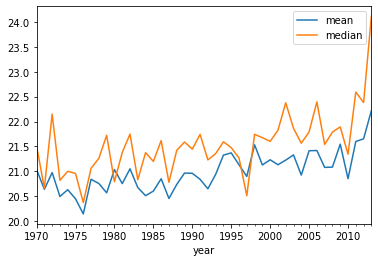

In [9]:
df_temperature_avg.xs('Mexico')['AverageTemperature'].plot()

## Data Set mas compacto
Se esta contruyendo un Data Set mas compacto y que nos facilitara para nuestro analisis.

In [10]:
df_t_med = df_temperature_avg['AverageTemperature']['median'].reset_index()
df_t_med

,Country,year,median
0,Afghanistan,1970-12-31,16.1990
1,Afghanistan,1971-12-31,14.9340
2,Afghanistan,1972-12-31,13.8725
3,Afghanistan,1973-12-31,14.9130
4,Afghanistan,1974-12-31,13.6160
...,...,...,...
10687,Åland,2009-12-31,5.5765
10688,Åland,2010-12-31,4.7550
10689,Åland,2011-12-31,7.4990
10690,Åland,2012-12-31,6.2540


## Creamos una columna que solo contenga el año

In [11]:
df_t_med['date'] = df_t_med['year'].dt.year
df_t_med['date']

0        1970
1        1971
2        1972
3        1973
4        1974
         ... 
10687    2009
10688    2010
10689    2011
10690    2012
10691    2013
Name: date, Length: 10692, dtype: int64

## Renombrar algunas columnas

In [12]:
df_t_med.rename(columns={'median':'temperature'}, inplace=True)
df_t_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


## Creando una Tabla Pivot

In [13]:
df_t_pivot = df_t_med.pivot_table(values='temperature' , index='date', columns='Country')
df_t_pivot

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,
1970,16.1990,25.2360,12.4230,23.2840,26.7180,11.6390,22.9640,27.1510,27.2240,15.1150,...,15.7640,15.5410,25.2780,24.6330,26.7220,23.8210,27.4390,22.1330,23.2560,6.9340
1971,14.9340,24.7755,11.6735,22.7810,26.4845,11.9275,22.4615,26.5295,26.3810,14.7665,...,16.5470,12.9860,24.6480,24.1105,26.2470,20.2715,26.5130,21.8265,22.7055,4.4870
1972,13.8725,25.1230,11.2175,22.4985,26.8205,10.0250,22.6070,26.9150,26.7700,14.3445,...,16.9190,13.5640,25.2615,24.5165,26.6150,21.3905,26.8175,21.9800,22.3980,5.6200
1973,14.9130,25.3445,11.8370,22.9975,27.0120,9.5525,23.0730,27.3360,27.1725,14.8675,...,17.5420,13.4735,25.2020,25.0080,27.0685,22.9215,27.2265,22.1090,22.5815,3.5795
1974,13.6160,24.8260,11.3210,21.5795,26.6350,8.2045,22.3275,26.6015,26.5190,15.2160,...,17.4025,13.2105,25.0760,24.3700,26.1720,21.5755,26.6320,21.6005,21.3255,5.4550
1975,13.5130,24.8045,12.3595,23.0740,26.6510,10.4105,22.4210,26.4780,26.3340,15.1515,...,17.1810,13.3395,24.9790,24.9900,26.2985,20.5175,26.1155,21.8635,21.7910,6.0170
1976,14.1615,24.8225,12.6080,22.2980,26.6155,9.6625,22.1455,26.9825,26.8425,14.3965,...,16.5660,11.3820,25.0590,24.4665,26.6620,20.4625,26.3220,21.6980,21.9880,4.3855
1977,15.6575,25.0345,11.9870,23.5375,26.7085,10.4055,22.6000,27.2010,27.0085,15.9725,...,18.3455,13.8000,25.6165,24.6295,26.8935,22.6755,26.8845,22.1670,22.2910,5.4745
1978,15.2580,24.9135,11.5490,22.5620,26.7250,9.7565,22.7055,27.2320,27.0370,15.3350,...,17.1655,13.2965,25.5600,24.4290,26.9675,21.7730,27.0135,22.1010,22.6210,5.7475


## Graficado

<AxesSubplot:>

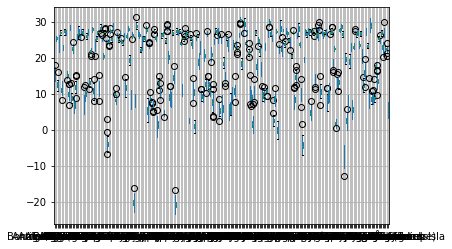

In [14]:
df_t_pivot.boxplot()

<AxesSubplot:>

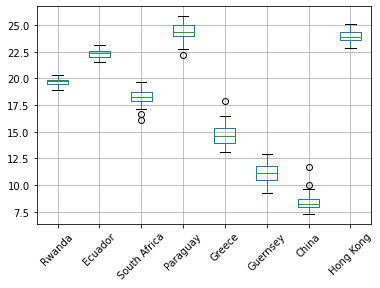

In [15]:
df_t_pivot.T.sample(8).T.boxplot(rot=45)

# Preprocesamiento de datos: terminando de preparar y limpiar los datasets

Topic https://data.worldbank.org/topic/climate-change

CO2 (kt) https://data.worldbank.org/indicator/EN.ATM.CO2E.KT

Forest (km2) https://data.worldbank.org/indicator/AG.LND.FRST.K2

Agricultura (km2) https://data.worldbank.org/indicator/AG.LND.AGRI.K2

Population (7mM) https://data.worldbank.org/indicator/SP.POP.TOTL

Electric power consumption (kWh per capita) https://data.worldbank.org/indicator/EG.USE.ELEC.KH.PC

In [81]:
df_agri = pd.read_csv('db/API_AG.LND.AGRI.K2_DS2_en_csv_v2_716226.csv',header=2)
df_fore = pd.read_csv('db/API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv',header=2)
df_elec = pd.read_csv('db/API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_715482.csv',header=2)
df_co2e = pd.read_csv('db/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv',header=2)
df_popu = pd.read_csv('db/API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv',header=2)
df_popu

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0,1845300.0,NaN,NaN
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,...,23807588.0,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0,NaN,NaN
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,...,52004172.0,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,NaN,NaN
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,...,14023193.0,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0,NaN,NaN


## Unificar los DataFrames

In [82]:
range_year = range(1971,2015)
map(str,range_year)
cols = ['Country Name','Country Code'] + list(map(str,range(1971,2015)))
cols[:5]

['Country Name', 'Country Code', '1971', '1972', '1973']

Para convertir todas las columnas como si fuera una serie se usaria la funcion
Convertir las columnas **(años)** a solo **dos columnas** usando la funcion **melt**.

In [83]:
def table_format(df,col='agriculture'):
    return df.loc[:,cols].melt(id_vars=['Country Name','Country Code']).rename(
        columns={'variable':'date',
            'Country Name':'Country',
            'Country Code':'name',
            'value':col
        })


df_agri = table_format(df_agri, col = 'agriculture')
df_fore = table_format(df_fore, col = 'forest')
df_elec = table_format(df_elec, col = 'electricprod')
df_co2e = table_format(df_co2e, col = 'co2')
df_popu = table_format(df_popu, col = 'population')

df_popu.head(3)

,Country,name,date,population
0,Aruba,ABW,1971,59440.0
1,Afghanistan,AFG,1971,11475445.0
2,Angola,AGO,1971,6040777.0


Unificar la columna tipo **date** a numero **flotante**

In [84]:
df_popu['date'] = df_popu['date'].astype(float)
df_fore['date'] = df_fore['date'].astype(float)
df_agri['date'] = df_agri['date'].astype(float)
df_elec['date'] = df_elec['date'].astype(float)
df_co2e['date'] = df_co2e['date'].astype(float)
df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11616 entries, 0 to 11615
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     11616 non-null  object 
 1   name        11616 non-null  object 
 2   date        11616 non-null  float64
 3   population  11501 non-null  float64
dtypes: float64(2), object(2)
memory usage: 363.1+ KB


## Merge a multiples DataFrames

In [92]:
df_merge = pd.merge(
    df_t_med[['Country','temperature','date']],
    df_popu,
    on = ['Country','date'],
    how = 'inner'
)
df_merge = pd.merge(
    df_merge,
    df_co2e,
    on = ['Country','name','date'],
    how = 'inner'
)

df_merge = pd.merge(
    df_merge,
    df_elec,
    on = ['Country','name','date'],
    how = 'inner'
)

df_merge = pd.merge(
    df_merge,
    df_agri,
    on = ['Country','name','date'],
    how = 'inner'
)

df_merge = pd.merge(
    df_merge,
    df_fore,
    on = ['Country','name','date'],
    how = 'inner'
)

Eliminando los objetos nulos

In [93]:
df_merge.dropna()

,Country,temperature,date,name,population,co2,electricprod,agriculture,forest
62,Albania,13.4490,1990,ALB,3286542.0,5515.168,552.252185,11210.0,7887.999878
63,Albania,11.5885,1991,ALB,3266790.0,4286.723,418.453589,11270.0,7868.499756
64,Albania,13.5850,1992,ALB,3247039.0,2515.562,453.644074,11270.0,7849.000244
65,Albania,13.6500,1993,ALB,3227287.0,2335.879,536.363825,11260.0,7829.500122
66,Albania,13.2390,1994,ALB,3207536.0,1925.175,596.407959,11260.0,7810.000000
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526968.0,5603.176,585.456912,163000.0,159510.000000
7220,Zimbabwe,23.3040,2010,ZWE,12697723.0,7777.707,606.644199,162000.0,156240.000000
7221,Zimbabwe,22.9420,2011,ZWE,12894316.0,9563.536,636.249337,164000.0,153115.996094
7222,Zimbabwe,23.0455,2012,ZWE,13115131.0,7792.375,608.762505,162000.0,149992.001953


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=40d7a071-7e6a-4668-9914-a7e81441c111' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>